In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Pizza.csv')

In [3]:
df

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [5]:
df['brand'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [6]:
Y = df['brand']

X = df.drop(['brand','id'], axis='columns')

In [8]:
from sklearn.preprocessing import StandardScaler

sc =  StandardScaler()

Scaled = sc.fit_transform(X)

In [35]:
cov_mat = np.cov(Scaled.T)

In [36]:
Eigval , Eigvec = np.linalg.eig(cov_mat)

In [42]:
#Cumulative EigenValues to check the variance retention
tot = np.sum(Eigval)
mval = 0
for i in sorted(Eigval, reverse=True):
    mval += np.round(i*100/tot, 2)
    print(mval)
    
# var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

59.6
92.32
98.24
99.6
100.0
100.0
100.0


Here we see that in first 3 components only, Our varaince retention is more than 98%. So, We will take the value of n_components or K = 3 .

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6) # We will use K=3 when working on a real problem, but
                            #to demonstrate the variance ratio, we kept k=6

In [77]:
x_data = pca.fit_transform(Scaled)

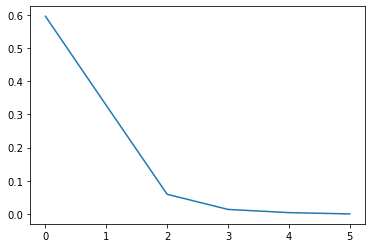

In [78]:
plt.plot(pca.explained_variance_ratio_)

In [79]:
np.round(pd.DataFrame(x_data).corr(),2)

,0,1,2,3,4,5
0,1.0,0.0,-0.0,-0.0,0.0,-0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.0,0.0,1.0,-0.0,0.0,0.0
3,-0.0,0.0,-0.0,1.0,-0.0,0.0
4,0.0,0.0,0.0,-0.0,1.0,-0.0
5,-0.0,0.0,0.0,0.0,-0.0,1.0
